In [1]:
from datasets import load_abundance_data, get_shared_taxa_dfs
from datasets import MicroDataset, Dataset
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
dfs = load_abundance_data()
all_datasets = get_shared_taxa_dfs(dfs)

import sys
sys.path.append('learn2learn')

In [2]:
from Inference.inference import get_inference
from baseline.training_functions import DAE_parameters, VAE_parameters, SAE_parameters
from Metalearning.MAML import MAML_FFNN_parameters

## Making IBD Importance Plot

In [3]:
groups = {
          'EU': ['IBD', 'Obesity', 'Colorectal', 'EW-T2D'],
          'CH':['C-T2D', 'Cirrhosis'], 
          'T2D':['EW-T2D','C-T2D']
        }
meta_ds = [all_datasets[g] for g in groups['EU']]

# setting up best parameters, as reported in the reults csvs
stand_params = [1024, 32, 'svm']
share_params = [64, 4, 'svm']
meta_params = [0.0494584468215704, 0.07376827811002731, 1024, 64, 32, 0.3, 1]

best_share_params = {q['name']:w for q,w in zip( [a for a in VAE_parameters if a['type'] == 'choice' ],
                            share_params) }

best_stand_params = {q['name']:w for q,w in zip( [a for a in DAE_parameters if a['type'] == 'choice' ],
                            stand_params) }



best_meta_params = {q['name']:w for q,w in zip( [a for a in MAML_FFNN_parameters if a['type'] == 'choice' ] + \
                            [a for a in MAML_FFNN_parameters if a['type'] == 'range' ],
                            meta_params[2:] + meta_params[:2]) }




GPU available: False, used: False
TPU available: False, using: 0 TPU cores
[INFO 04-21 23:49:40] ax.modelbridge.dispatch_utils: Using Sobol generation strategy.
[INFO 04-21 23:49:40] ax.service.managed_loop: Started full optimization with 10 steps.
[INFO 04-21 23:49:40] ax.service.managed_loop: Running optimization trial 1...
[INFO 04-21 23:49:40] ax.service.managed_loop: Running optimization trial 2...
[INFO 04-21 23:49:40] ax.service.managed_loop: Running optimization trial 3...
[INFO 04-21 23:49:40] ax.service.managed_loop: Running optimization trial 4...
[INFO 04-21 23:49:40] ax.service.managed_loop: Running optimization trial 5...
[INFO 04-21 23:49:40] ax.service.managed_loop: Running optimization trial 6...
[INFO 04-21 23:49:40] ax.service.managed_loop: Running optimization trial 7...
[INFO 04-21 23:49:40] ax.service.managed_loop: Running optimization trial 8...
[INFO 04-21 23:49:41] ax.service.managed_loop: Running optimization trial 9...
[INFO 04-21 23:49:41] ax.service.managed

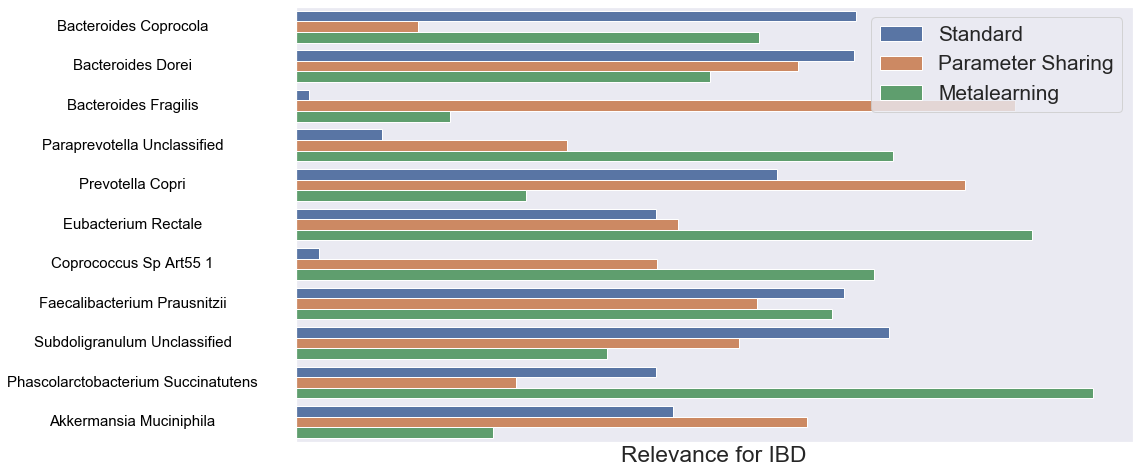

In [4]:
g = get_inference(best_stand_params,
                  best_share_params,
                  best_meta_params, 
                  meta_ds,
                  stand_model = 'DAE',
                  share_model = 'VAE', 
                  dataset_name = 'IBD', 
                  seed = 0  # still not consistent, even with the seed
                 )
#Save Figure to figures
plt.title(None)
plt.savefig('figures/IBD_Inference__.png', bbox_inches = 'tight', pad_inches=.75)

## Inference for Obesity

In [5]:
groups = {
          'EU': ['Obesity', 'IBD', 'Colorectal', 'EW-T2D'],
          'CH':['C-T2D', 'Cirrhosis'], 
          'T2D':['EW-T2D','C-T2D']
        }
     
meta_ds = [all_datasets[g] for g in groups['EU']]

# setting up best parameters, as reported in the reuslts csvs
stand_params = [128, 'svm']
share_params = [256, 32, 'rf']
meta_params = [0.014412704342603683, 0.013474401043355465, 256, 256, 128, 0.3, 16]

best_share_params = {q['name']:w for q,w in zip( [a for a in DAE_parameters if a['type'] == 'choice' ],
                            share_params) }

best_stand_params = {q['name']:w for q,w in zip( [a for a in SAE_parameters if a['type'] == 'choice' ],
                            stand_params) }



best_meta_params = {q['name']:w for q,w in zip( [a for a in MAML_FFNN_parameters if a['type'] == 'choice' ] + \
                            [a for a in MAML_FFNN_parameters if a['type'] == 'range' ],
                            meta_params[2:] + meta_params[:2]) }



GPU available: False, used: False
TPU available: False, using: 0 TPU cores
[INFO 04-21 23:50:40] ax.modelbridge.dispatch_utils: Using Sobol generation strategy.
[INFO 04-21 23:50:40] ax.service.managed_loop: Started full optimization with 10 steps.
[INFO 04-21 23:50:40] ax.service.managed_loop: Running optimization trial 1...
[INFO 04-21 23:50:41] ax.service.managed_loop: Running optimization trial 2...
[INFO 04-21 23:50:41] ax.service.managed_loop: Running optimization trial 3...
[INFO 04-21 23:50:41] ax.service.managed_loop: Running optimization trial 4...
[INFO 04-21 23:50:41] ax.service.managed_loop: Running optimization trial 5...
[INFO 04-21 23:50:41] ax.service.managed_loop: Running optimization trial 6...
[INFO 04-21 23:50:41] ax.service.managed_loop: Running optimization trial 7...
[INFO 04-21 23:50:41] ax.service.managed_loop: Running optimization trial 8...
[INFO 04-21 23:50:41] ax.service.managed_loop: Running optimization trial 9...
[INFO 04-21 23:50:42] ax.service.managed

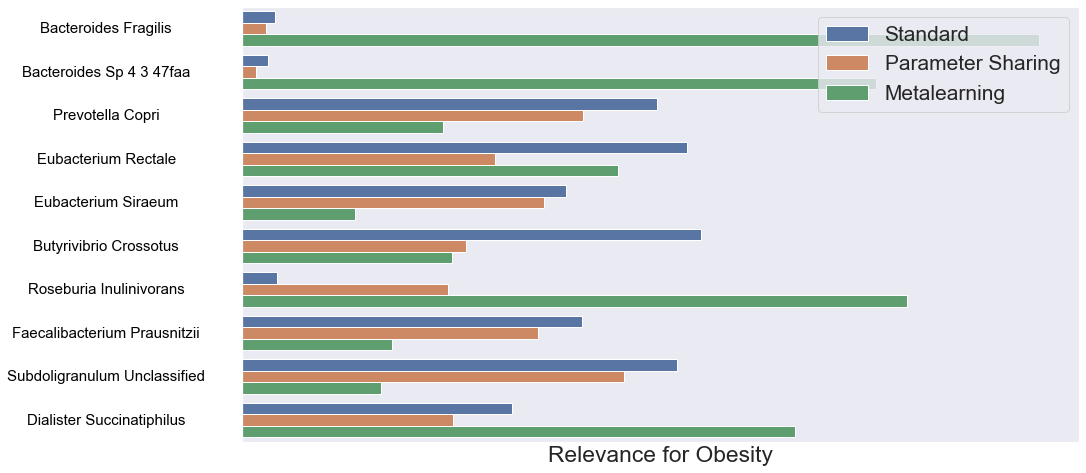

In [6]:
g = get_inference(best_stand_params,
                  best_share_params,
                  best_meta_params, 
                  meta_ds,
                  stand_model = 'SAE',
                  share_model = 'DAE', 
                  dataset_name = 'Obesity', 
                  seed = 0  # still not consistent, even with the seed
                 )
#Save Plot to figures
plt.title(None)
plt.savefig('figures/Obesity_Inference__.png', bbox_inches = 'tight', pad_inches=.75)